# CS6220: Data Mining Techniques
## Fall 2024: Final Project
#### Aloe Vera Team
#### Abdelrahman Zeidan, Abhyuday Sureka, Dominic Cauteruccio, Maitreya Mahendra Darokar

# Notebook and Data Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, neural_network
import seaborn as sns
import random
import time

In [ ]:
path = "https://drive.google.com/uc?id=1emwgCjecANSlXqHuVEaTph02ob9M6_Wm"

In [ ]:
oridf = pd.read_csv(path)

In [ ]:
display(oridf.shape)
display(oridf.head())
display(oridf.tail(1))

(30204, 25)

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
30203,30000,50000,male,university,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,default


In [ ]:
# Drop the redundant column header
oridf.columns = oridf.loc[0]
oridf = oridf.drop(index=0)
oridf = oridf.set_index("ID")
display(oridf.head())


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [ ]:
#Troubleshoting a bad row
oridf[oridf["LIMIT_BAL"]== "X1"]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
NaN,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y


In [ ]:
#Troubleshoting another bad row
oridf[oridf["LIMIT_BAL"]== "LIMIT_BAL"]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [ ]:
oridf = oridf.drop(index = "ID")
oridf = oridf.drop(index = np.nan)

In [ ]:
oridf

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,male,high school,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
29997,150000,male,high school,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,not default
29998,30000,male,university,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,default


# Clean the data

In [ ]:
# Check for Missing Values
oridf.isna().sum()

,0
0,
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [ ]:
# Check for duplicate Values:
oridf.duplicated().sum()

236

In [ ]:
# Check for duplicate rows:
oridf[oridf.duplicated(keep=False)].drop_duplicates().shape


(235, 24)

In [ ]:
# Remove duplicate rows:
oridf = oridf.drop_duplicates()

In [ ]:
oridf

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,male,high school,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
29997,150000,male,high school,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,not default
29998,30000,male,university,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,default


# Checking the dtypes

In [ ]:
oridf.dtypes

,0
0,
LIMIT_BAL,object
SEX,object
EDUCATION,object
MARRIAGE,object
AGE,object
PAY_0,object
PAY_2,object
PAY_3,object
PAY_4,object


# dividing the dataframe into a string version and a numeric version

In [ ]:
# Drop non-numeric columns
numericdf = oridf.drop(columns=["SEX", "EDUCATION", "default payment next month"])

In [ ]:
numericdf

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,1,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,26,-1,2,0,0,0,2,2682,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,34,0,0,0,0,0,0,29239,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,1,37,0,0,0,0,0,0,46990,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,57,-1,0,-1,0,0,0,8617,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,39,0,0,0,0,0,0,188948,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,150000,2,43,-1,-1,-1,-1,0,0,1683,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,30000,2,37,4,3,2,-1,0,0,3565,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [ ]:
numericdf = numericdf.astype(int)

In [ ]:
# Extract string columns
stringdf = oridf[["SEX", "EDUCATION", "default payment next month"]]

In [ ]:
stringdf.head()

,SEX,EDUCATION,default payment next month
ID,,,
1,female,university,default
2,female,university,default
3,female,university,not default
4,female,university,not default
5,male,university,not default


In [ ]:
numericdf.dtypes

,0
0,
LIMIT_BAL,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64
PAY_5,int64
PAY_6,int64


In [ ]:
tempdf = pd.concat([stringdf, numericdf], axis="columns")

In [ ]:
# this df has a duplicate in it
tempdf

,SEX,EDUCATION,default payment next month,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,female,university,default,20000,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
2,female,university,default,120000,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,female,university,not default,90000,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,female,university,not default,50000,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,male,university,not default,50000,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,male,high school,not default,220000,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,male,high school,not default,150000,2,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,male,university,default,30000,2,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [ ]:
tempdf.dtypes

,0
0,
SEX,object
EDUCATION,object
default payment next month,object
LIMIT_BAL,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64


In [ ]:
cleaned_df = tempdf.copy()
# savepoint 1 - AS using for savepoint 1

Savepoint for decision tree - so other code doesn't break

In [ ]:
savepoint1 = cleaned_df.copy()

In [ ]:
# Convert object columns to categorical type for efficiency and clarity
tempdf["SEX"] = tempdf["SEX"].astype("category")
tempdf["EDUCATION"] = tempdf["EDUCATION"].astype("category")
tempdf["default payment next month"] = tempdf["default payment next month"].astype("category")


In [ ]:
tempdf.dtypes

,0
0,
SEX,category
EDUCATION,category
default payment next month,category
LIMIT_BAL,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64


In [ ]:
print(tempdf["SEX"].unique())
print("\n")
print(tempdf["EDUCATION"].unique())
print("\n")
print(tempdf["default payment next month"].unique())

['female', 'male']
Categories (2, object): ['female', 'male']


['university', 'graduate school', 'high school', 'other']
Categories (4, object): ['graduate school', 'high school', 'other', 'university']


['default', 'not default']
Categories (2, object): ['default', 'not default']


In [ ]:
# Convert 'default payment next month' to binary values: 1 for 'default' and 0 for 'not default'
tempdf["default payment next month"] = tempdf["default payment next month"].apply(lambda x: 1 if x == "default" else 0)

# Verify the conversion
print(tempdf["default payment next month"].unique())

[1, 0]
Categories (2, int64): [1, 0]


In [ ]:
tempdf["default payment next month"].value_counts()

,count
default payment next month,
0,23335
1,6630


In [ ]:
cleandf = tempdf.copy()

---

### SAVEPOINT 1

# This is one of the cleaned versions

In [ ]:
savepoint1

,SEX,EDUCATION,default payment next month,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,female,university,default,20000,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
2,female,university,default,120000,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,female,university,not default,90000,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,female,university,not default,50000,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,male,university,not default,50000,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,male,high school,not default,220000,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,male,high school,not default,150000,2,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,male,university,default,30000,2,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


# Data Analysis

In [ ]:
sex = cleaned_df["SEX"].value_counts()
sex

,count
SEX,
female,18091
male,11874


In [ ]:
education = cleaned_df["EDUCATION"].value_counts()
education

,count
EDUCATION,
university,14019
graduate school,10563
high school,4915
other,468


In [ ]:
marriage = cleaned_df["MARRIAGE"].value_counts()
marriage

,count
MARRIAGE,
2,15945
1,13643
3,323
0,54


In [ ]:
def get_color(df):
    lst = []
    string = "123456789ABCDEF"
    for i in range(len(df)):
        temp = random.choices(string, k = 6)
        temp = "".join(temp)
        temp = "#" + temp
        lst.append(temp)
    # print(temp)
    return lst


In [ ]:
get_color(education)

['#C6F91F', '#428C92', '#BA9383', '#831C76']

<Axes: title={'center': 'sex'}>

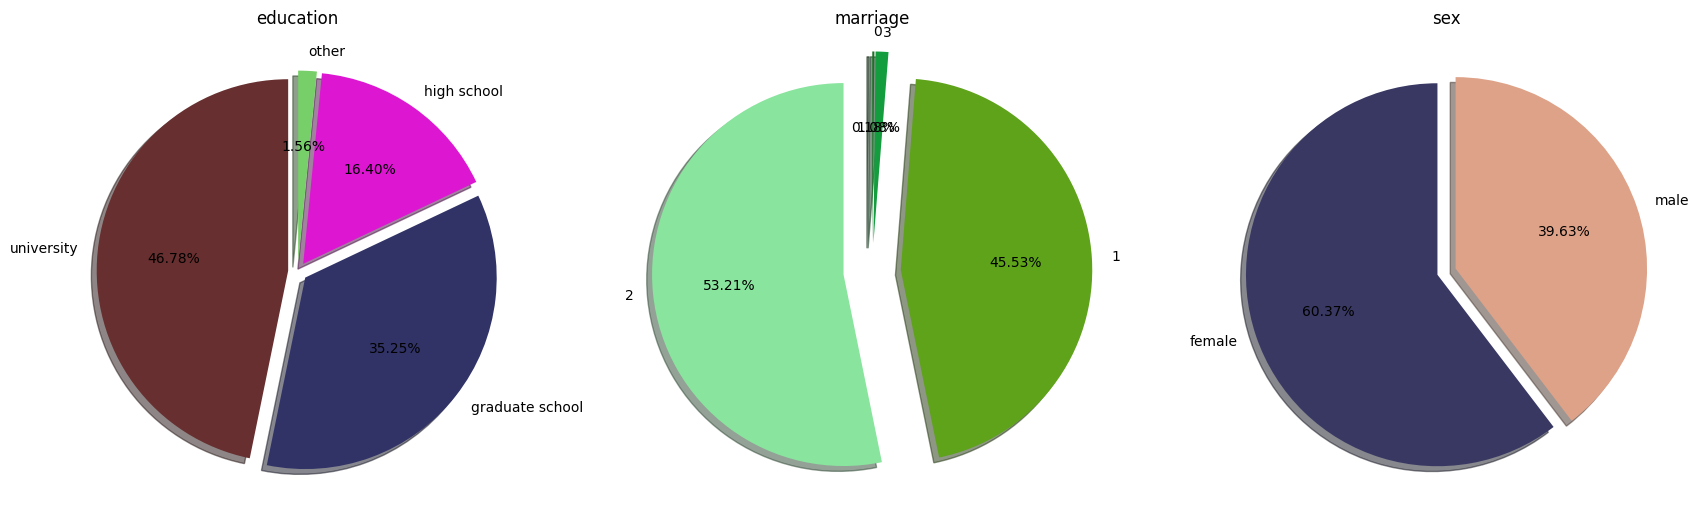

In [ ]:
fig,axs = plt.subplots(1,3, figsize = (21,7))
education.plot(kind='pie', ax=axs[0], label = "", title="education",
               explode = [0.05,0.05,0.05,0.05], shadow = True,
               startangle = 90, autopct = "%.2f%%", colors=get_color(education))

# marriage.plot(kind='pie', ax=axs[1])
marriage.plot(kind='pie', ax=axs[1], label = "", title="marriage",
               explode = [0.15,0.15,0.15,0.15], shadow = True,
               startangle = 90, autopct = "%.2f%%", colors=get_color(marriage))

# sex.plot(kind='pie', ax=axs[2])
sex.plot(kind='pie', ax=axs[2], label = "", title="sex",
               explode = [0.05,0.05], shadow = True,
               startangle = 90, autopct = "%.2f%%", colors=get_color(sex))

<Axes: title={'center': 'sex'}, ylabel='SEX'>

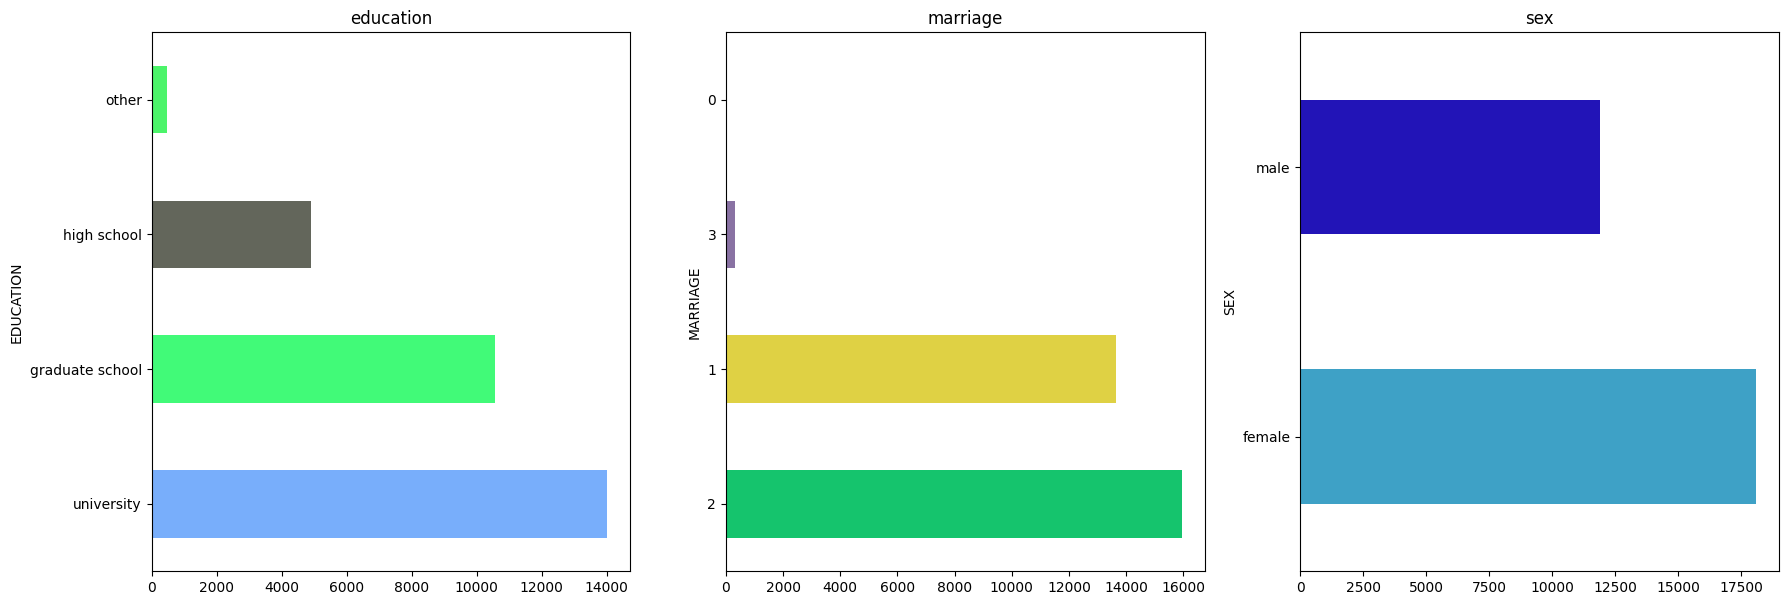

In [ ]:
fig,axs = plt.subplots(1,3, figsize = (21,7))
education.plot(kind='barh', ax=axs[0], label = "", title="education", color=get_color(education))
marriage.plot(kind='barh', ax=axs[1], label = "", title="marriage", color=get_color(marriage))
sex.plot(kind='barh', ax=axs[2], label = "", title="sex", color=get_color(sex))



# Model building

In [ ]:
# Import libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE



In [ ]:
# ---- Data Preparation ----

# 1. Create a copy of the dataset for processing
cleandf = tempdf.copy()

# 2. Separate features (X) and target (y)
X = cleandf.drop(columns=["default payment next month"])
y = cleandf["default payment next month"]

# 3. Perform One-hot encoding on categorical variables ('SEX' and 'EDUCATION')
#    This converts categorical variables into binary columns
X = pd.get_dummies(X, columns=["SEX", "EDUCATION"], drop_first=True)

# 4. Scale numeric features using StandardScaler
#    Scaling ensures all features are on a similar scale, necessary for models like Logistic Regression and SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# 6. Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



### Cross Validation

In [ ]:
class CrossValidation:
    @staticmethod
    def run_cross_validation(model_class, X, y, splits, model_params=None):
        '''
        Perform cross-validation on the given model and dataset.

        Parameters:
        - model_class: The class or callable to instantiate a new model (e.g., LogisticRegression).
        - X: Feature set (DataFrame, Series, or array-like).
        - y: Target labels (Series or array-like).
        - splits: Number of folds for K-Fold cross-validation.
        - model_params: Dictionary of parameters to initialize the model (optional).

        Returns:
        - Lists of accuracy, precision, recall, and F1 scores for each fold.
        '''
        # Initialize KFold with shuffling
        kf = KFold(n_splits=splits, shuffle=True, random_state=42)

        # Initialize lists to store results
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []
        confusion_matrices = []

        # Perform cross-validation
        for train_index, test_index in kf.split(X):
            # Use .iloc if X and y are pandas objects; otherwise, index directly
            if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            else:
                X_train, X_test = X[train_index], X[test_index]

            # Always use .iloc for y when it's a pandas Series
            if isinstance(y, pd.Series):
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            else:
                y_train, y_test = y[train_index], y[test_index]


            # Create a new instance of the model for this fold
            model = model_class(**(model_params if model_params else {}))

            # Train the model
            model.fit(X_train, y_train)

            # Predict and evaluate
            y_pred = model.predict(X_test)

            # Compute metrics
            accuracy_scores.append(accuracy_score(y_test, y_pred))
            precision_scores.append(precision_score(y_test, y_pred))
            recall_scores.append(recall_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))
            confusion_matrices.append(confusion_matrix(y_test, y_pred))

        return accuracy_scores, precision_scores, recall_scores, f1_scores, confusion_matrices


    @staticmethod
    def calculate_scores(accuracy_scores, precision_scores, recall_scores, f1_scores):
        '''
        Calculate and display average and standard deviation of scores.
        '''
        # Calculate averages and standard deviations
        avg_accuracy = np.mean(accuracy_scores)
        std_accuracy = np.std(accuracy_scores)

        avg_precision = np.mean(precision_scores)
        std_precision = np.std(precision_scores)

        avg_recall = np.mean(recall_scores)
        std_recall = np.std(recall_scores)

        avg_f1 = np.mean(f1_scores)
        std_f1 = np.std(f1_scores)

        # print(f"Accuracy -> Avg: {avg_accuracy:.4f}, Std Dev: {std_accuracy:.4f}")
        # print(f"Precision -> Avg: {avg_precision:.4f}, Std Dev: {std_precision:.4f}")
        # print(f"Recall -> Avg: {avg_recall:.4f}, Std Dev: {std_recall:.4f}")
        # print(f"F1 -> Avg: {avg_f1:.4f}, Std Dev: {std_f1:.4f}")

        return avg_accuracy, avg_precision, avg_recall, avg_f1


### Logistic Regression

eror in below cell :ValueError: pos_label=1 is not a valid label. It should be one of ['default', 'not default']

In [ ]:
# Parameters for Logistic Regression
log_reg_params = {'class_weight': 'balanced', 'random_state': 42}

# Instantiate the CrossValidation class and run cross-validation
cv = CrossValidation()

# Run 5-fold cross-validation
log_reg_accuracy_scores, log_reg_precision_scores, log_reg_recall_scores, log_reg_f1_scores, log_reg_confusion_matrices = cv.run_cross_validation(
    model_class=LogisticRegression,  # Pass the model class
    X=X_train_resampled,                       # Use the preprocessed training data
    y=y_train_resampled,                       # Use the corresponding training labels
    splits=5,                        # Number of folds
    model_params=log_reg_params      # Parameters for Logistic Regression
)

# Calculate and display the average scores
log_reg_avg_accuracy, log_reg_avg_precision, log_reg_avg_recall, log_reg_avg_f1 = cv.calculate_scores(
    log_reg_accuracy_scores, log_reg_precision_scores, log_reg_recall_scores, log_reg_f1_scores
)

# Print a summary of the results
print("Cross-Validation Results for Logistic Regression:")
print(f"Average Accuracy:  {log_reg_avg_accuracy:.4f}")
print(f"Average Precision: {log_reg_avg_precision:.4f}")
print(f"Average Recall:    {log_reg_avg_recall:.4f}")
print(f"Average F1-Score:  {log_reg_avg_f1:.4f}")


Cross-Validation Results for Logistic Regression:
Average Accuracy:  0.6782
Average Precision: 0.6814
Average Recall:    0.6696
Average F1-Score:  0.6754


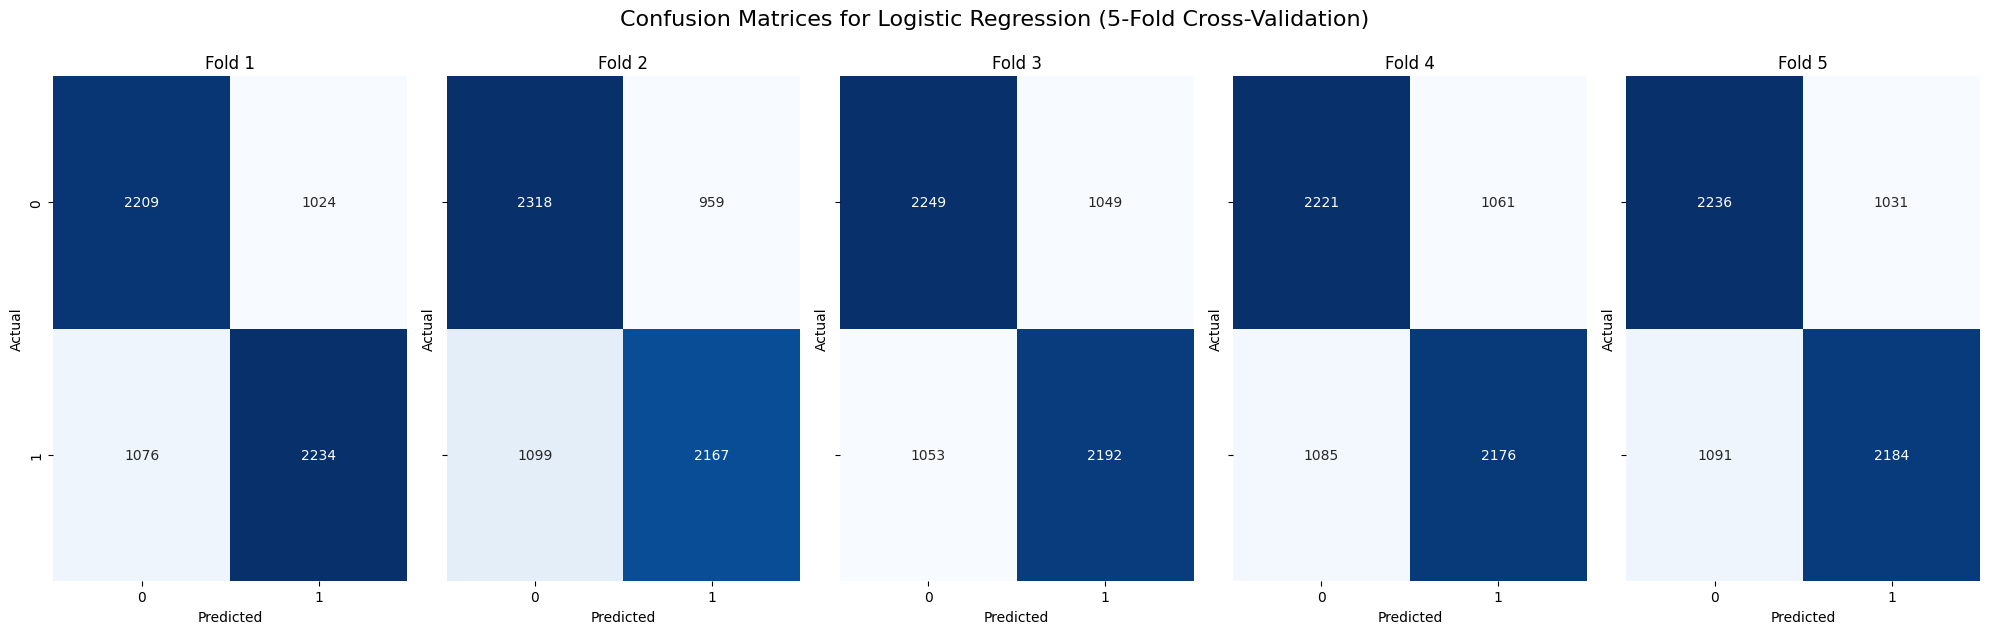

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, len(log_reg_confusion_matrices), figsize=(20, 6), sharex=True, sharey=True)

# Plot each confusion matrix
for i, ax in enumerate(axes):
    sns.heatmap(log_reg_confusion_matrices[i], annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f"Fold {i + 1}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Adjust layout
plt.tight_layout()
plt.suptitle("Confusion Matrices for Logistic Regression (5-Fold Cross-Validation)", y=1.05, fontsize=16)
plt.show()

### Support Vector Machine (SVM)

In [ ]:
# Parameters for SVM
svm_params = {'kernel': 'linear', 'class_weight': 'balanced', 'random_state': 42, 'probability': False}


# Instantiate the CrossValidation class and run cross-validation
cv = CrossValidation()

# Run 5-fold cross-validation
svm_accuracy_scores, svm_precision_scores, svm_recall_scores, svm_f1_scores, svm_confusion_matrices = cv.run_cross_validation(
    model_class=SVC,            # Pass the SVM class
    X=X_train_resampled,                  # Use the preprocessed training data
    y=y_train_resampled,                  # Use the corresponding training labels
    splits=5,                   # Number of folds
    model_params=svm_params     # Parameters for SVM
)

# Calculate and display the average scores
svm_avg_accuracy, svm_avg_precision, svm_avg_recall, svm_avg_f1 = cv.calculate_scores(
    svm_accuracy_scores, svm_precision_scores, svm_recall_scores, svm_f1_scores
)

# Print a summary of the results
print("Cross-Validation Results for SVM:")
print(f"Average Accuracy:  {svm_avg_accuracy:.4f}")
print(f"Average Precision: {svm_avg_precision:.4f}")
print(f"Average Recall:    {svm_avg_recall:.4f}")
print(f"Average F1-Score:  {svm_avg_f1:.4f}")

Cross-Validation Results for SVM:
Average Accuracy:  0.6904
Average Precision: 0.7495
Average Recall:    0.5720
Average F1-Score:  0.6487


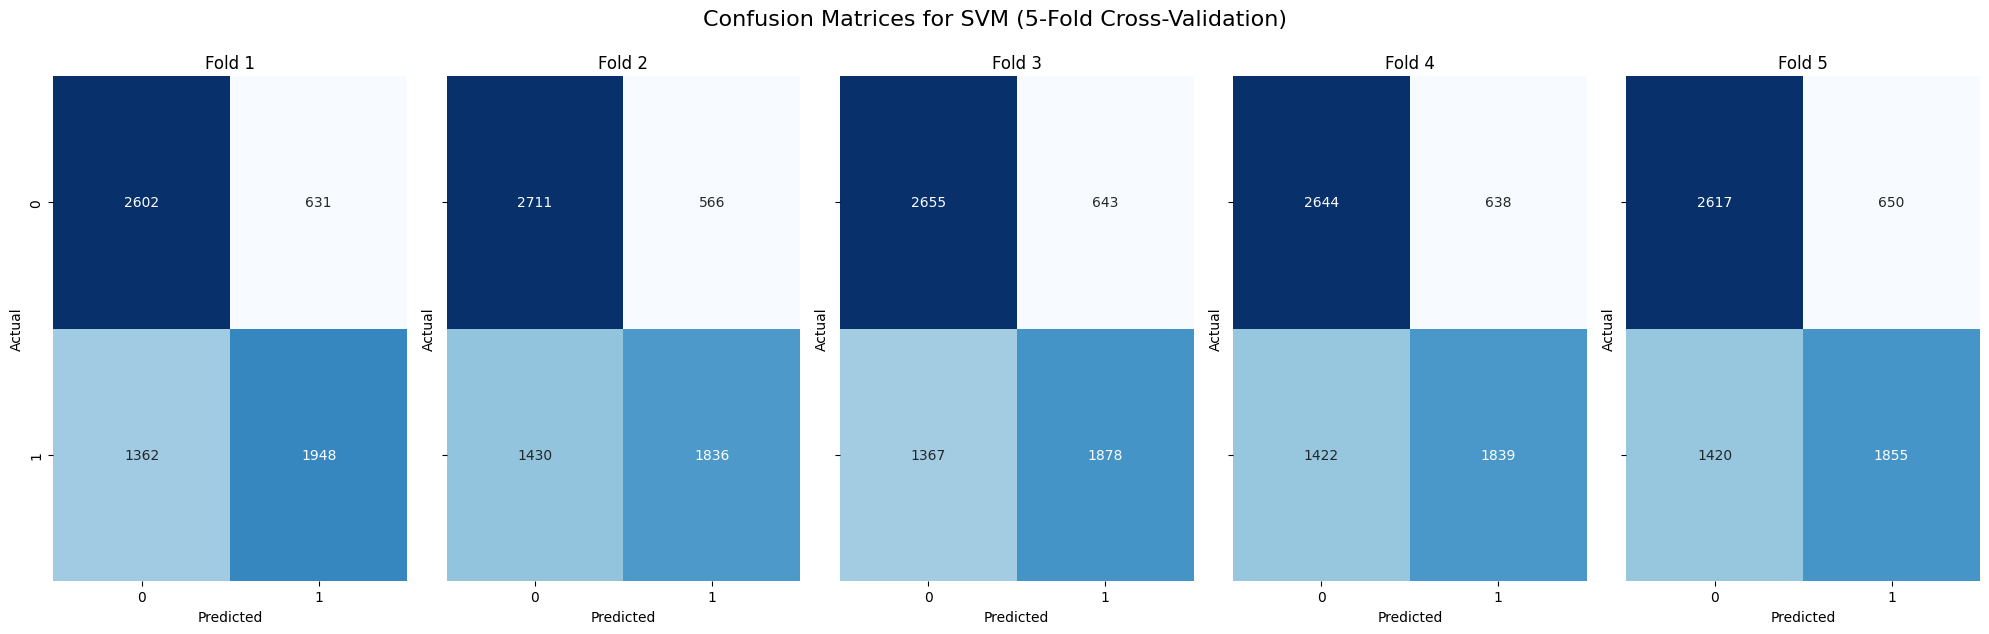

In [ ]:
# Create subplots for SVM confusion matrices
fig, axes = plt.subplots(1, len(svm_confusion_matrices), figsize=(20, 6), sharex=True, sharey=True)

# Plot each confusion matrix for SVM
for i, ax in enumerate(axes):
    sns.heatmap(svm_confusion_matrices[i], annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f"Fold {i + 1}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Adjust layout
plt.tight_layout()
plt.suptitle("Confusion Matrices for SVM (5-Fold Cross-Validation)", y=1.05, fontsize=16)
plt.show()

### Artificial Neural Network (ANN)


#### Single Layer: (100,)

In [ ]:
from sklearn.neural_network import MLPClassifier

# ---- Cross-Validation for MLPClassifier ----

# Parameters for MLPClassifier
mlp_params = {
    'hidden_layer_sizes': (100,),  # Single hidden layer with 100 neurons
    'activation': 'relu',         # Activation function
    'solver': 'adam',             # Optimizer
    'random_state': 42,           # For reproducibility
    'max_iter': 200,              # Maximum number of iterations
    'early_stopping': True,       # Enable early stopping
    'n_iter_no_change': 10        # Stop if no improvement in 10 epochs
}

# Instantiate the CrossValidation class and run cross-validation
cv = CrossValidation()

# Run 5-fold cross-validation
mlp_accuracy_scores, mlp_precision_scores, mlp_recall_scores, mlp_f1_scores, mlp_confusion_matrices = cv.run_cross_validation(
    model_class=MLPClassifier,   # Pass the MLPClassifier class
    X=X_train_resampled,                   # Use the preprocessed training data
    y=y_train_resampled,                   # Use the corresponding training labels
    splits=5,                    # Number of folds
    model_params=mlp_params      # Parameters for MLPClassifier
)

# Calculate and display the average scores
mlp_avg_accuracy, mlp_avg_precision, mlp_avg_recall, mlp_avg_f1 = cv.calculate_scores(
    mlp_accuracy_scores, mlp_precision_scores, mlp_recall_scores, mlp_f1_scores
)

# Print a summary of the results
print("\nCross-Validation Results for MLPClassifier:")
print(f"Average Accuracy:  {mlp_avg_accuracy:.4f}")
print(f"Average Precision: {mlp_avg_precision:.4f}")
print(f"Average Recall:    {mlp_avg_recall:.4f}")
print(f"Average F1-Score:  {mlp_avg_f1:.4f}")



Cross-Validation Results for MLPClassifier:
Average Accuracy:  0.7268
Average Precision: 0.7500
Average Recall:    0.6812
Average F1-Score:  0.7136


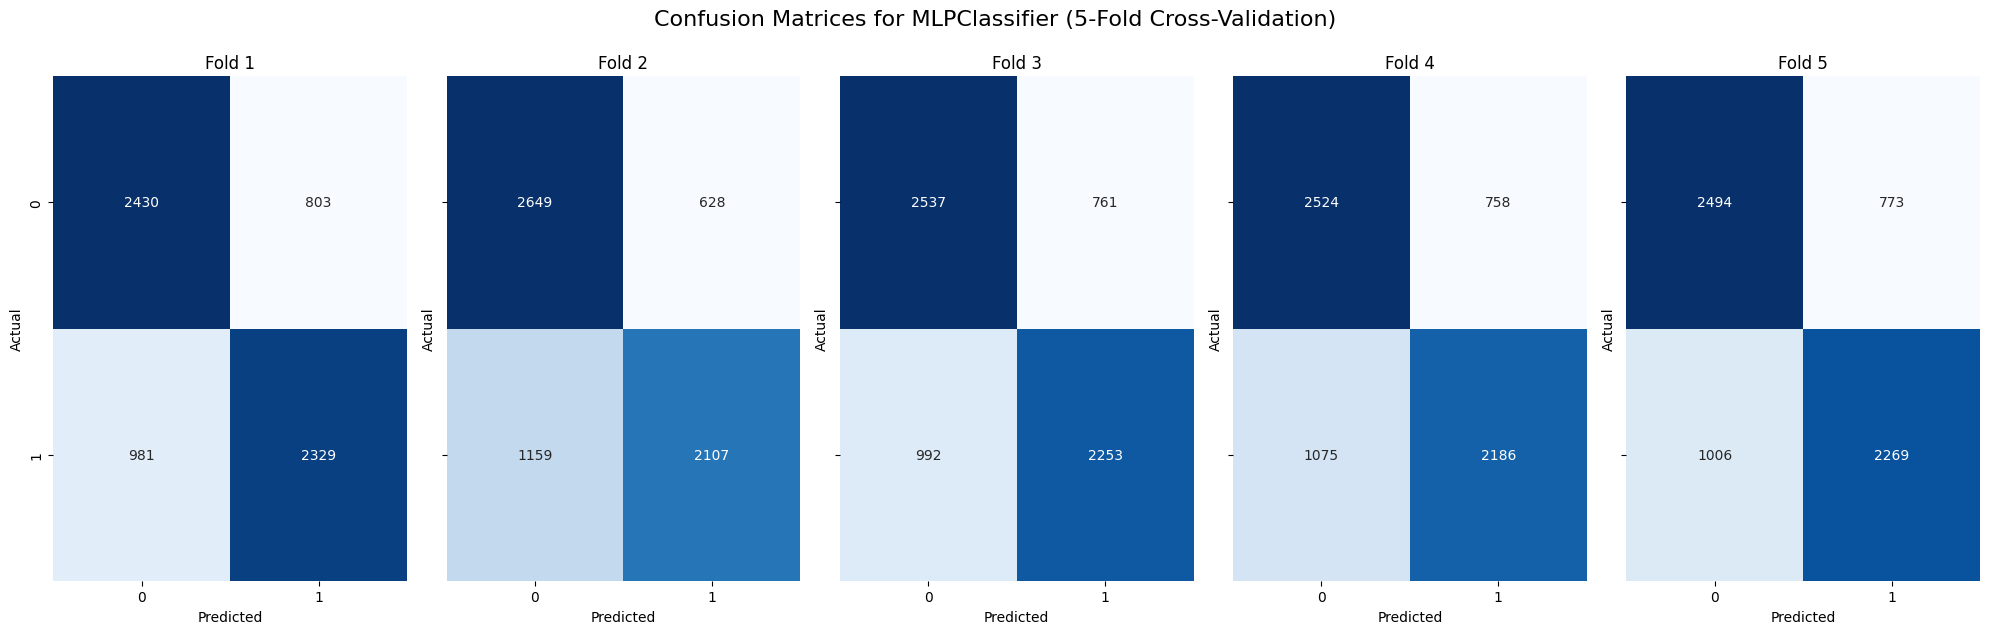

In [ ]:
################################################### Abdelrahman
# Create subplots for MLPClassifier confusion matrices
fig, axes = plt.subplots(1, len(mlp_confusion_matrices), figsize=(20, 6), sharex=True, sharey=True)

# Plot each confusion matrix for MLPClassifier
for i, ax in enumerate(axes):
    sns.heatmap(mlp_confusion_matrices[i], annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f"Fold {i + 1}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Adjust layout
plt.tight_layout()
plt.suptitle("Confusion Matrices for MLPClassifier (5-Fold Cross-Validation)", y=1.05, fontsize=16)
plt.show()


#### Two Layer: (100, 100)

In [ ]:
# ---- Cross-Validation for MLPClassifier ----

# Parameters for MLPClassifier
mlp_params = {
    'hidden_layer_sizes': (100,100),  # 2 layers, 100 neurons
    'activation': 'relu',         # Activation function
    'solver': 'adam',             # Optimizer
    'random_state': 42,           # For reproducibility
    'max_iter': 200,              # Maximum number of iterations
    'early_stopping': True,       # Enable early stopping
    'n_iter_no_change': 10        # Stop if no improvement in 10 epochs
}

# Run 5-fold cross-validation
mlp_accuracy_scores, mlp_precision_scores, mlp_recall_scores, mlp_f1_scores, mlp_confusion_matrices = cv.run_cross_validation(
    model_class=MLPClassifier,   # Pass the MLPClassifier class
    X=X_train_resampled,                   # Use the preprocessed training data
    y=y_train_resampled,                   # Use the corresponding training labels
    splits=5,                    # Number of folds
    model_params=mlp_params      # Parameters for MLPClassifier
)

# Calculate and display the average scores
mlp_avg_accuracy, mlp_avg_precision, mlp_avg_recall, mlp_avg_f1 = cv.calculate_scores(
    mlp_accuracy_scores, mlp_precision_scores, mlp_recall_scores, mlp_f1_scores
)

# Print a summary of the results
print("\nCross-Validation Results for MLPClassifier:")
print(f"Average Accuracy:  {mlp_avg_accuracy:.4f}")
print(f"Average Precision: {mlp_avg_precision:.4f}")
print(f"Average Recall:    {mlp_avg_recall:.4f}")
print(f"Average F1-Score:  {mlp_avg_f1:.4f}")


Cross-Validation Results for MLPClassifier:
Average Accuracy:  0.7745
Average Precision: 0.7597
Average Recall:    0.8038
Average F1-Score:  0.7808


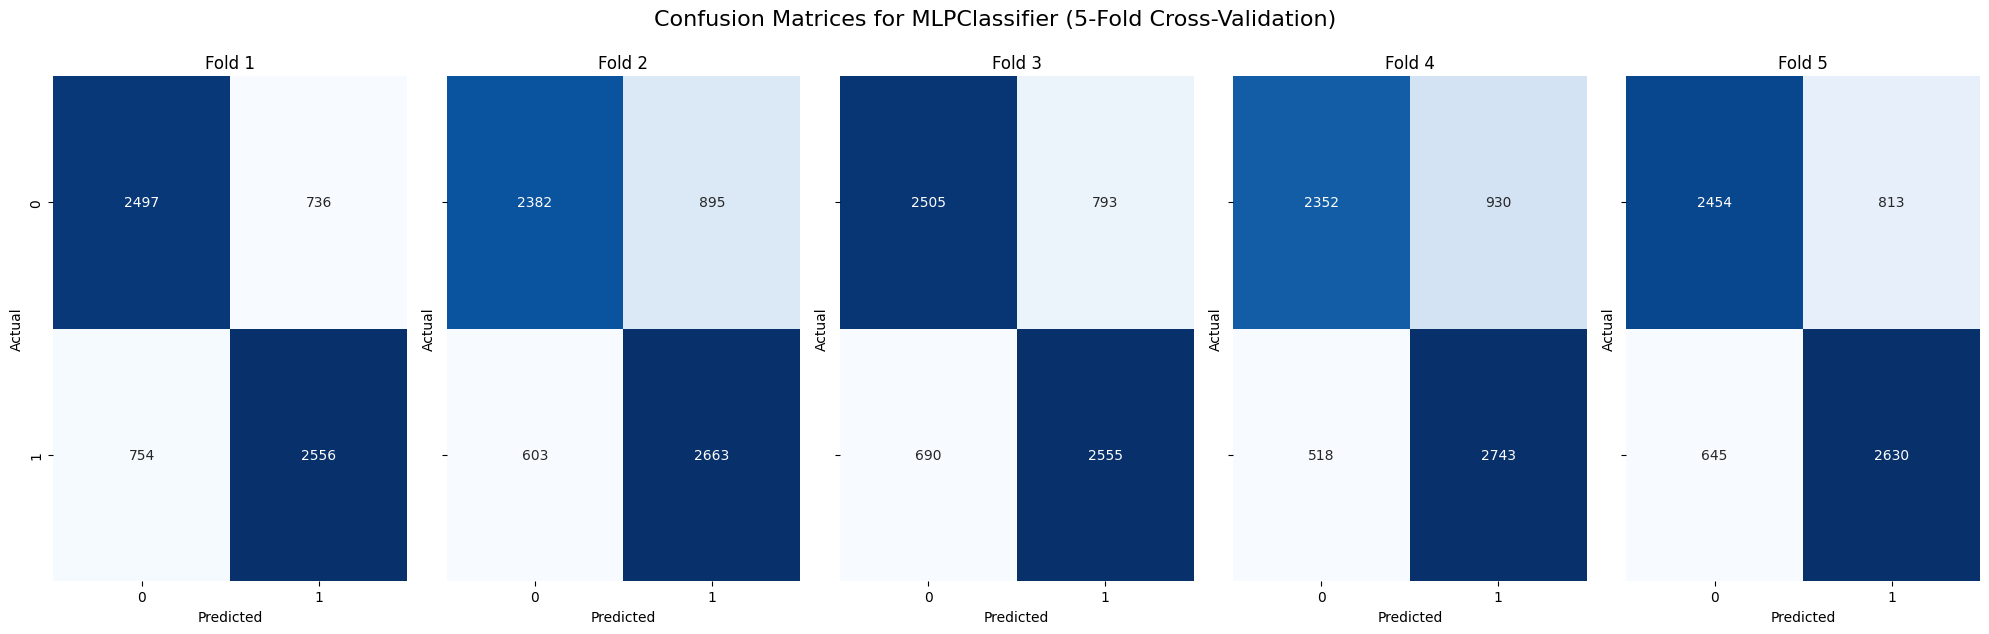

In [ ]:
# Create subplots for MLPClassifier confusion matrices
fig, axes = plt.subplots(1, len(mlp_confusion_matrices), figsize=(20, 6), sharex=True, sharey=True)

# Plot each confusion matrix for MLPClassifier
for i, ax in enumerate(axes):
    sns.heatmap(mlp_confusion_matrices[i], annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f"Fold {i + 1}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Adjust layout
plt.tight_layout()
plt.suptitle("Confusion Matrices for MLPClassifier (5-Fold Cross-Validation)", y=1.05, fontsize=16)
plt.show()

#### Three Layer: (100, 100, 100)

In [ ]:
# ---- Cross-Validation for MLPClassifier ----

# Parameters for MLPClassifier
mlp_params = {
    'hidden_layer_sizes': (100,100,100),  # Three hidden layers with 100 neurons
    'activation': 'relu',         # Activation function
    'solver': 'adam',             # Optimizer
    'random_state': 42,           # For reproducibility
    'max_iter': 200,              # Maximum number of iterations
    'early_stopping': True,       # Enable early stopping
    'n_iter_no_change': 10        # Stop if no improvement in 10 epochs
}

# Run 5-fold cross-validation
mlp_accuracy_scores, mlp_precision_scores, mlp_recall_scores, mlp_f1_scores, mlp_confusion_matrices = cv.run_cross_validation(
    model_class=MLPClassifier,   # Pass the MLPClassifier class
    X=X_train_resampled,                   # Use the preprocessed training data
    y=y_train_resampled,                   # Use the corresponding training labels
    splits=5,                    # Number of folds
    model_params=mlp_params      # Parameters for MLPClassifier
)

# Calculate and display the average scores
mlp_avg_accuracy, mlp_avg_precision, mlp_avg_recall, mlp_avg_f1 = cv.calculate_scores(
    mlp_accuracy_scores, mlp_precision_scores, mlp_recall_scores, mlp_f1_scores
)

# Print a summary of the results
print("\nCross-Validation Results for MLPClassifier:")
print(f"Average Accuracy:  {mlp_avg_accuracy:.4f}")
print(f"Average Precision: {mlp_avg_precision:.4f}")
print(f"Average Recall:    {mlp_avg_recall:.4f}")
print(f"Average F1-Score:  {mlp_avg_f1:.4f}")


Cross-Validation Results for MLPClassifier:
Average Accuracy:  0.7919
Average Precision: 0.7753
Average Recall:    0.8223
Average F1-Score:  0.7980


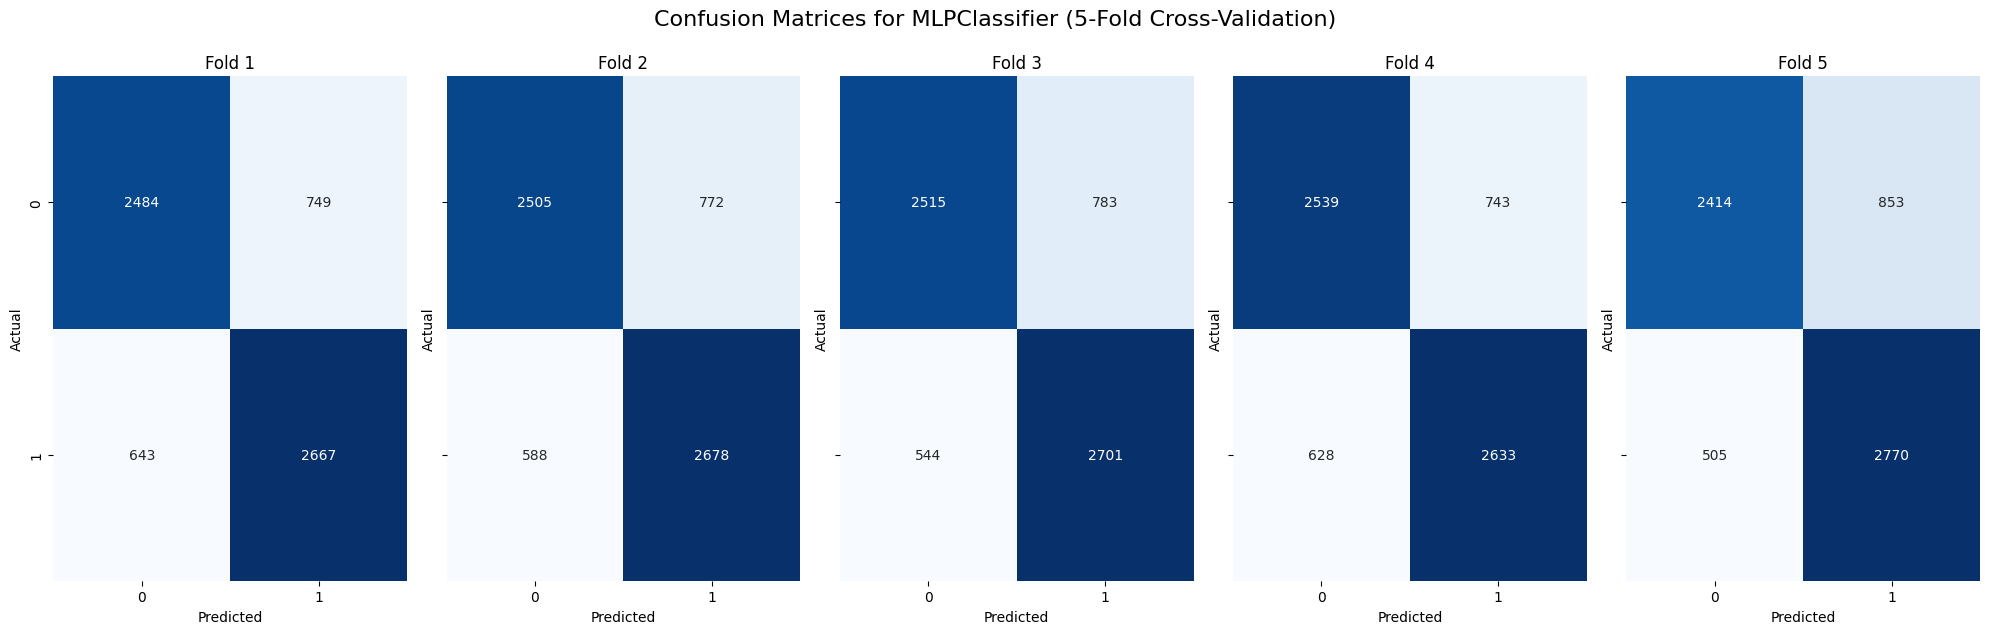

In [ ]:
# Create subplots for MLPClassifier confusion matrices
fig, axes = plt.subplots(1, len(mlp_confusion_matrices), figsize=(20, 6), sharex=True, sharey=True)

# Plot each confusion matrix for MLPClassifier
for i, ax in enumerate(axes):
    sns.heatmap(mlp_confusion_matrices[i], annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f"Fold {i + 1}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Adjust layout
plt.tight_layout()
plt.suptitle("Confusion Matrices for MLPClassifier (5-Fold Cross-Validation)", y=1.05, fontsize=16)
plt.show()

#### Three Layer: (200, 200, 200)

In [ ]:
# ---- Cross-Validation for MLPClassifier ----

# Parameters for MLPClassifier
mlp_params = {
    'hidden_layer_sizes': (200,200,200),  # Three hidden layer with 200 neurons
    'activation': 'relu',         # Activation function
    'solver': 'adam',             # Optimizer
    'random_state': 42,           # For reproducibility
    'max_iter': 200,              # Maximum number of iterations
    'early_stopping': True,       # Enable early stopping
    'n_iter_no_change': 10        # Stop if no improvement in 10 epochs
}

# Run 5-fold cross-validation
mlp_accuracy_scores, mlp_precision_scores, mlp_recall_scores, mlp_f1_scores, mlp_confusion_matrices = cv.run_cross_validation(
    model_class=MLPClassifier,   # Pass the MLPClassifier class
    X=X_train_resampled,                   # Use the preprocessed training data
    y=y_train_resampled,                   # Use the corresponding training labels
    splits=5,                    # Number of folds
    model_params=mlp_params      # Parameters for MLPClassifier
)

# Calculate and display the average scores
mlp_avg_accuracy, mlp_avg_precision, mlp_avg_recall, mlp_avg_f1 = cv.calculate_scores(
    mlp_accuracy_scores, mlp_precision_scores, mlp_recall_scores, mlp_f1_scores
)

winning_scores_mlp = [mlp_avg_accuracy, mlp_avg_precision, mlp_avg_recall, mlp_avg_f1]

# Print a summary of the results
print("\nCross-Validation Results for MLPClassifier:")
print(f"Average Accuracy:  {mlp_avg_accuracy:.4f}")
print(f"Average Precision: {mlp_avg_precision:.4f}")
print(f"Average Recall:    {mlp_avg_recall:.4f}")
print(f"Average F1-Score:  {mlp_avg_f1:.4f}")


Cross-Validation Results for MLPClassifier:
Average Accuracy:  0.8192
Average Precision: 0.7927
Average Recall:    0.8646
Average F1-Score:  0.8270


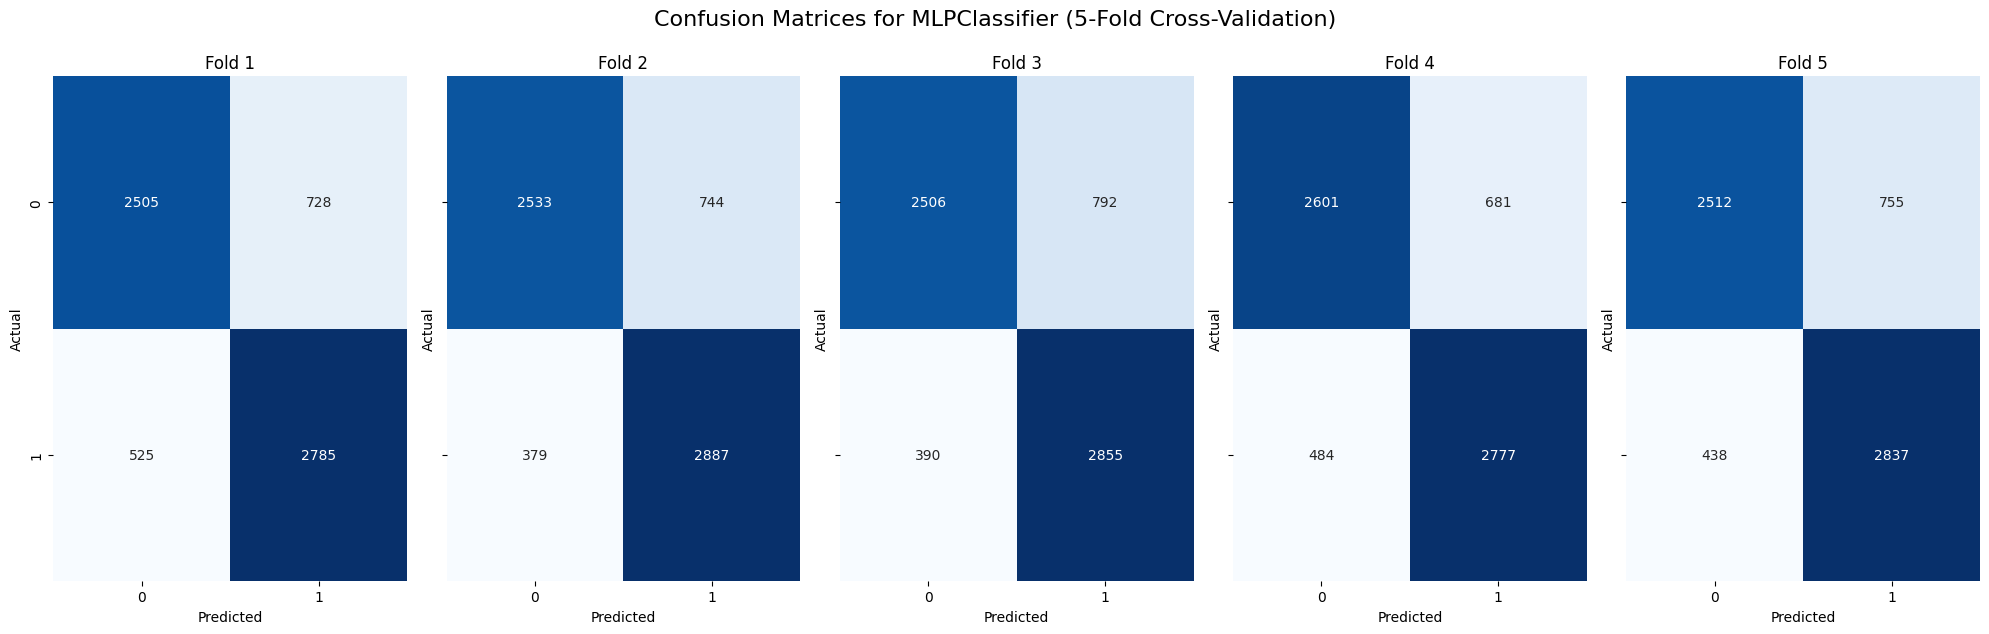

In [ ]:
# Create subplots for MLPClassifier confusion matrices
fig, axes = plt.subplots(1, len(mlp_confusion_matrices), figsize=(20, 6), sharex=True, sharey=True)

# Plot each confusion matrix for MLPClassifier
for i, ax in enumerate(axes):
    sns.heatmap(mlp_confusion_matrices[i], annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f"Fold {i + 1}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Adjust layout
plt.tight_layout()
plt.suptitle("Confusion Matrices for MLPClassifier (5-Fold Cross-Validation)", y=1.05, fontsize=16)
plt.show()

#### Four Layer: (100,100,100,100)

In [ ]:
# ---- Cross-Validation for MLPClassifier ----

# Parameters for MLPClassifier
mlp_params = {
    'hidden_layer_sizes': (100,100,100,100),  # Four hidden layer with 100 neurons
    'activation': 'relu',         # Activation function
    'solver': 'adam',             # Optimizer
    'random_state': 42,           # For reproducibility
    'max_iter': 200,              # Maximum number of iterations
    'early_stopping': True,       # Enable early stopping
    'n_iter_no_change': 10        # Stop if no improvement in 10 epochs
}

# Run 5-fold cross-validation
mlp_accuracy_scores, mlp_precision_scores, mlp_recall_scores, mlp_f1_scores, mlp_confusion_matrices = cv.run_cross_validation(
    model_class=MLPClassifier,   # Pass the MLPClassifier class
    X=X_train_resampled,                   # Use the preprocessed training data
    y=y_train_resampled,                   # Use the corresponding training labels
    splits=5,                    # Number of folds
    model_params=mlp_params      # Parameters for MLPClassifier
)

# Calculate and display the average scores
mlp_avg_accuracy, mlp_avg_precision, mlp_avg_recall, mlp_avg_f1 = cv.calculate_scores(
    mlp_accuracy_scores, mlp_precision_scores, mlp_recall_scores, mlp_f1_scores
)

# Print a summary of the results
print("\nCross-Validation Results for MLPClassifier:")
print(f"Average Accuracy:  {mlp_avg_accuracy:.4f}")
print(f"Average Precision: {mlp_avg_precision:.4f}")
print(f"Average Recall:    {mlp_avg_recall:.4f}")
print(f"Average F1-Score:  {mlp_avg_f1:.4f}")


Cross-Validation Results for MLPClassifier:
Average Accuracy:  0.8006
Average Precision: 0.7815
Average Recall:    0.8346
Average F1-Score:  0.8071


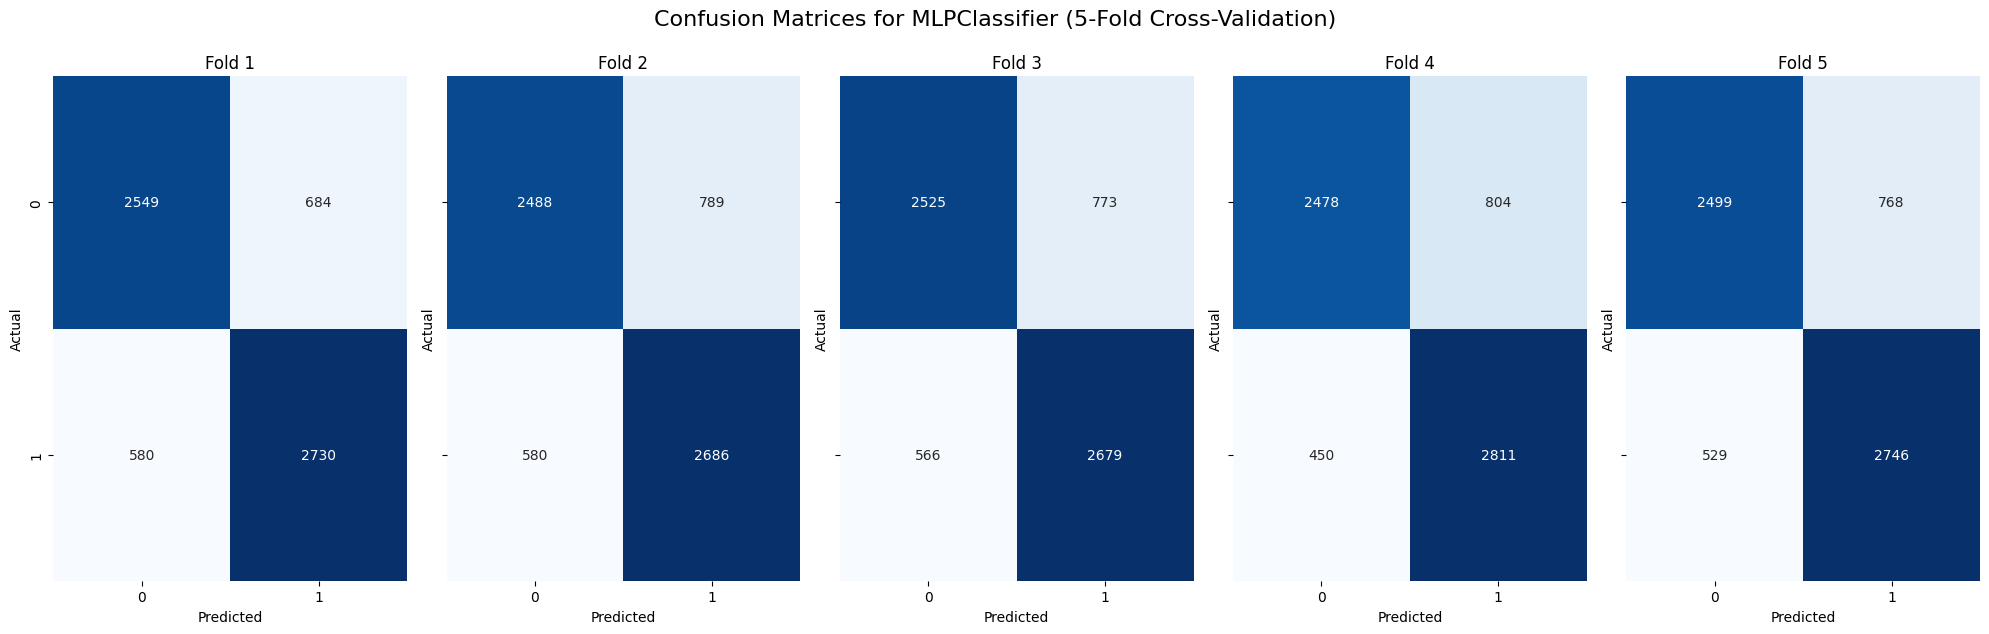

In [ ]:
# Create subplots for MLPClassifier confusion matrices
fig, axes = plt.subplots(1, len(mlp_confusion_matrices), figsize=(20, 6), sharex=True, sharey=True)

# Plot each confusion matrix for MLPClassifier
for i, ax in enumerate(axes):
    sns.heatmap(mlp_confusion_matrices[i], annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f"Fold {i + 1}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Adjust layout
plt.tight_layout()
plt.suptitle("Confusion Matrices for MLPClassifier (5-Fold Cross-Validation)", y=1.05, fontsize=16)
plt.show()

## Random Forest

In [ ]:
# Initializing the RF model with balanced class weights

rf = RandomForestClassifier(
    n_estimators = 500,
    max_depth = None,
    min_samples_split = 2,
    min_samples_leaf = 1,
    #max_features = 'sqrt',
    class_weight = 'balanced_subsample',
    random_state = 42
)

# Training the model
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=500,
                       random_state=42)

In [ ]:
# Making predictions
rf_pred = rf.predict(X_test)

rf_params = {
    'n_estimators': 500,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    #'max_features': 'sqrt',
    'class_weight': 'balanced_subsample',
    'random_state': 42
}

rf_accuracy_scores, rf_precision_scores, rf_recall_scores, rf_f1_scores, rf_confusion_matrices = cv.run_cross_validation(
    model_class=RandomForestClassifier,
    X=X_train_resampled,
    y=y_train_resampled,
    splits=5,
    model_params=rf_params
)

rf_avg_accuracy, rf_avg_precision, rf_avg_recall, rf_avg_f1 = cv.calculate_scores(
    rf_accuracy_scores, rf_precision_scores, rf_recall_scores, rf_f1_scores
)

rf_conf_matrix = confusion_matrix(y_test, rf_pred)

print("Random Forest:\n")
print(f"Avg Accuracy: {rf_avg_accuracy:.4f}")
print(f"Avg Precision: {rf_avg_precision:.4f}")
print(f"Avg Recall: {rf_avg_recall:.4f}")
print(f"Avg F1-Score: {rf_avg_f1:.4f}")

Random Forest:

Avg Accuracy: 0.8593
Avg Precision: 0.8742
Avg Recall: 0.8394
Avg F1-Score: 0.8564


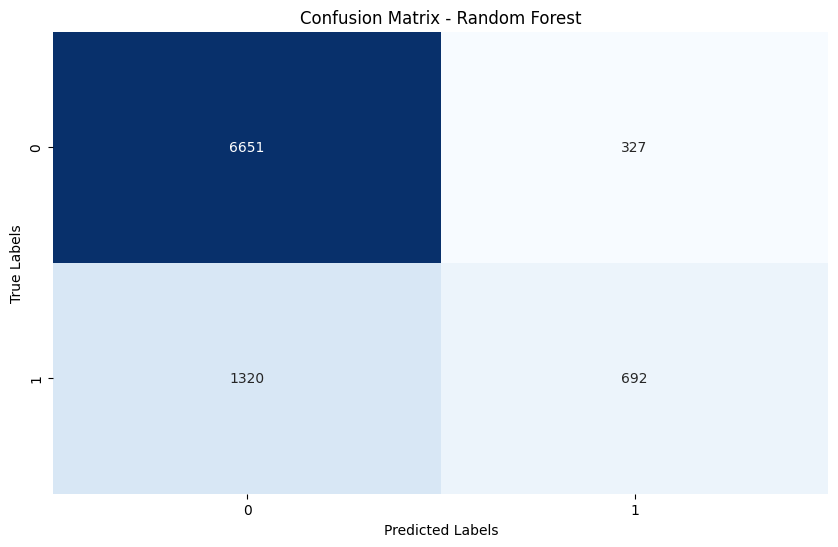

In [ ]:
# Confusion Matrix - visualization

plt.figure(figsize=(10, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Getting feature importance

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})

In [ ]:
feature_importance = feature_importance.sort_values('importance', ascending=False)

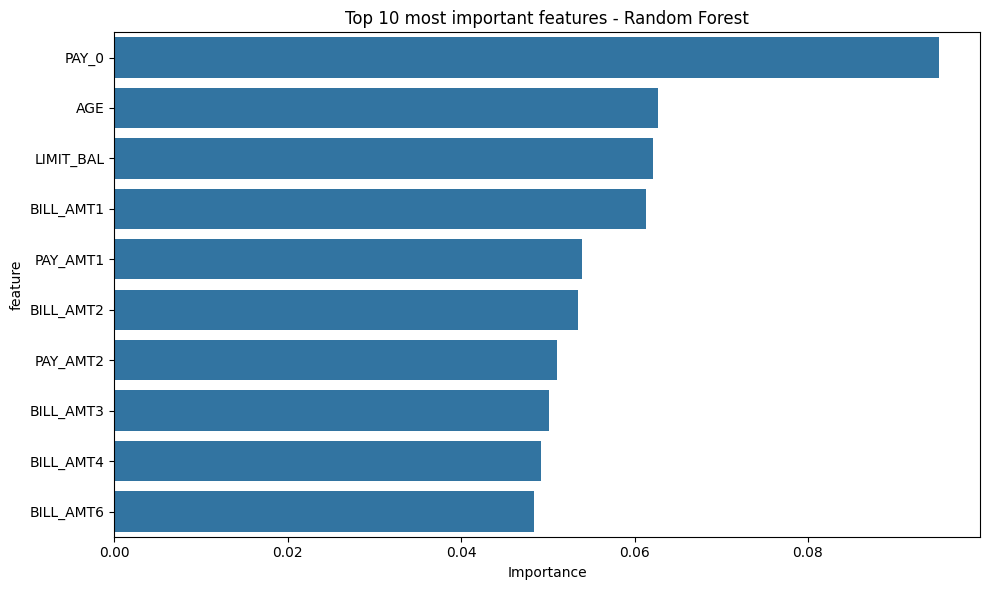

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title("Top 10 most important features - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
###### Decision Tree with Cross Validation
dt_params = {}

dt_accuracy_scores, dt_precision_scores, dt_recall_scores, dt_f1_scores, dt_confusion_matrices = cv.run_cross_validation(
    model_class=DecisionTreeClassifier,
    X=X_train_resampled,
    y=y_train_resampled,
    splits=5,
    model_params=dt_params
)

dt_avg_accuracy, dt_avg_precision, dt_avg_recall, dt_avg_f1 = cv.calculate_scores(
    dt_accuracy_scores, dt_precision_scores, dt_recall_scores, dt_f1_scores
)

print("Naive Tree:\n")
print(f"Avg Accuracy: {dt_avg_accuracy:.4f}")
print(f"Avg Precision: {dt_avg_precision:.4f}")
print(f"Avg Recall: {dt_avg_recall:.4f}")
print(f"Avg F1-Score: {dt_avg_f1:.4f}")

Naive Tree:

Avg Accuracy: 0.7647
Avg Precision: 0.7561
Avg Recall: 0.7814
Avg F1-Score: 0.7685


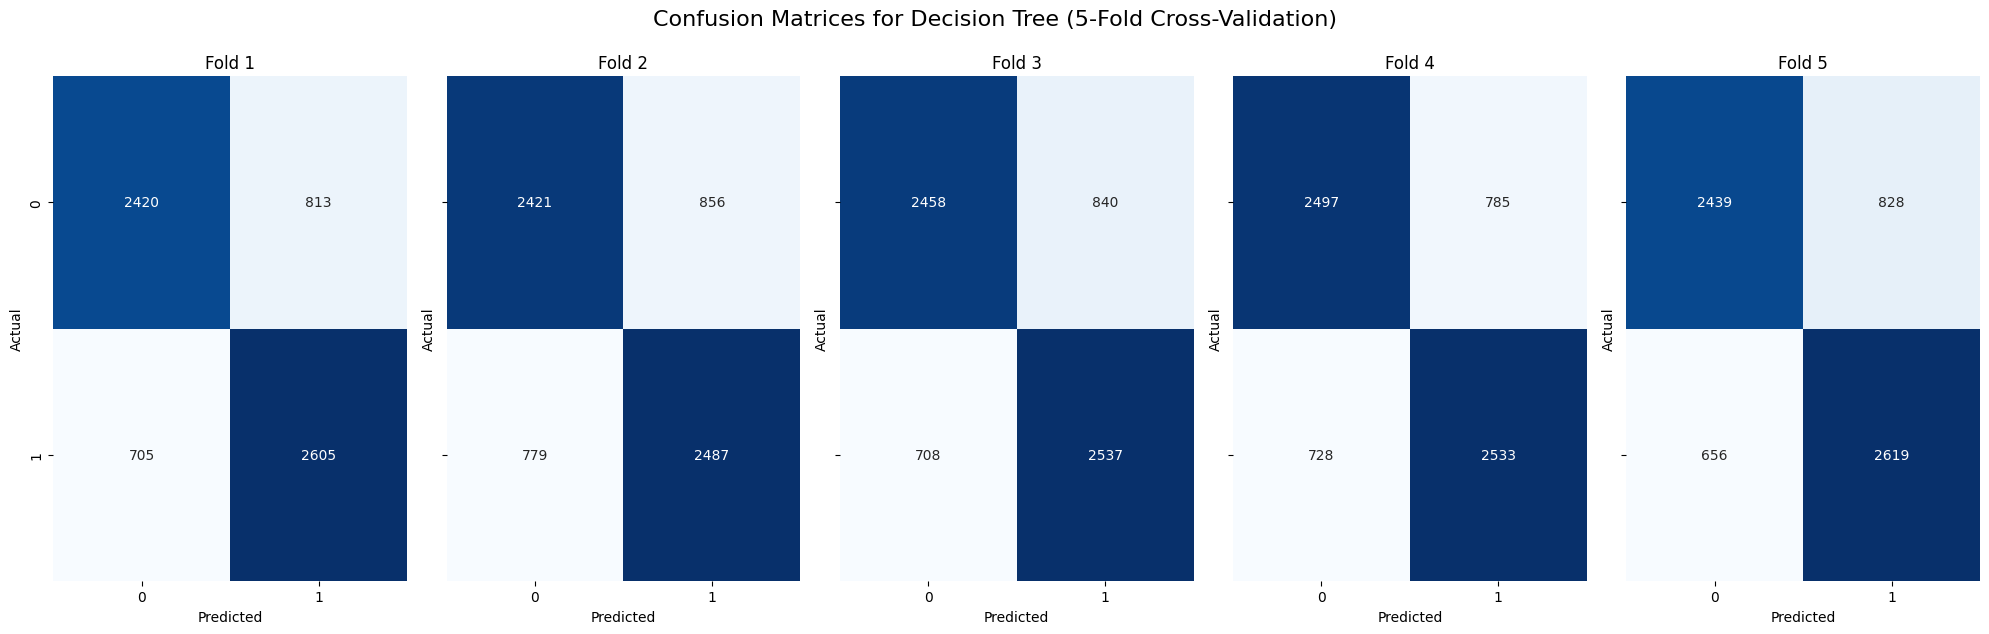

In [ ]:
# Create subplots for MLPClassifier confusion matrices
fig, axes = plt.subplots(1, len(dt_confusion_matrices), figsize=(20, 6), sharex=True, sharey=True)

# Plot each confusion matrix for MLPClassifier
for i, ax in enumerate(axes):
    sns.heatmap(dt_confusion_matrices[i], annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f"Fold {i + 1}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Adjust layout
plt.tight_layout()
plt.suptitle("Confusion Matrices for Decision Tree (5-Fold Cross-Validation)", y=1.05, fontsize=16)
plt.show()

In [ ]:
##### Simple Tree
dt_params = {'max_depth': 3}

dt_accuracy_scores, dt_precision_scores, dt_recall_scores, dt_f1_scores, dt_confusion_matrices = cv.run_cross_validation(
    model_class=DecisionTreeClassifier,
    X=X_train_resampled,
    y=y_train_resampled,
    splits=5,
    model_params=dt_params
)

dt_simple_avg_accuracy, dt_simple_avg_precision, dt_simple_avg_recall, dt_simple_avg_f1 = cv.calculate_scores(
    dt_accuracy_scores, dt_precision_scores, dt_recall_scores, dt_f1_scores
)

print("Naive Tree:\n")
print(f"Avg Accuracy: {dt_simple_avg_accuracy:.4f}")
print(f"Avg Precision: {dt_simple_avg_precision:.4f}")
print(f"Avg Recall: {dt_simple_avg_recall:.4f}")
print(f"Avg F1-Score: {dt_simple_avg_f1:.4f}")

Naive Tree:

Avg Accuracy: 0.7061
Avg Precision: 0.7528
Avg Recall: 0.6150
Avg F1-Score: 0.6765


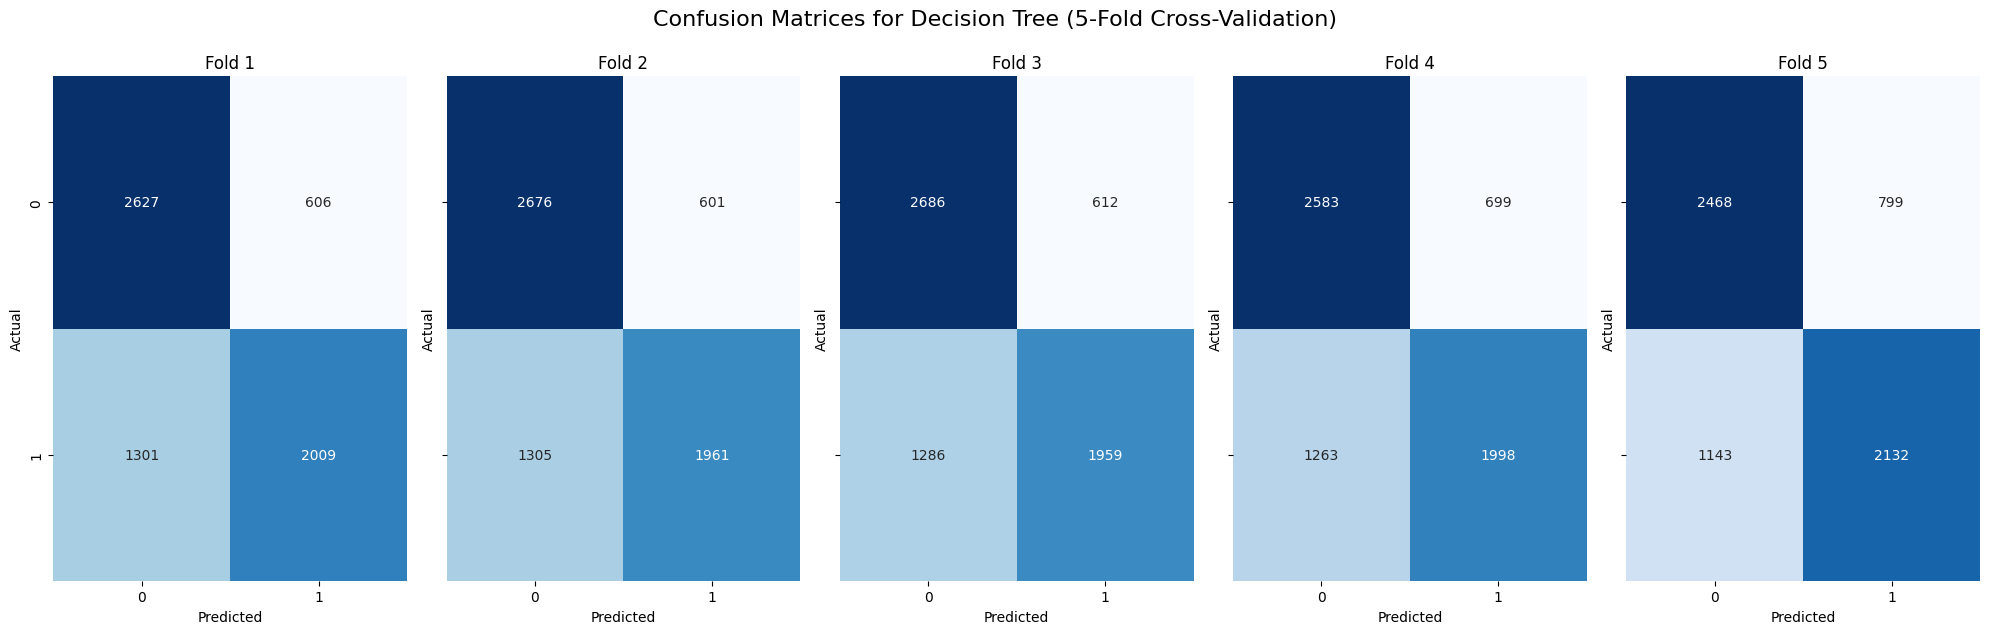

In [ ]:
# Create subplots for MLPClassifier confusion matrices
fig, axes = plt.subplots(1, len(dt_confusion_matrices), figsize=(20, 6), sharex=True, sharey=True)

# Plot each confusion matrix for MLPClassifier
for i, ax in enumerate(axes):
    sns.heatmap(dt_confusion_matrices[i], annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f"Fold {i + 1}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Adjust layout
plt.tight_layout()
plt.suptitle("Confusion Matrices for Decision Tree (5-Fold Cross-Validation)", y=1.05, fontsize=16)
plt.show()

In [ ]:
cleaned_df = savepoint1.copy()

In [ ]:
cleaned_df.head(1)

,SEX,EDUCATION,default payment next month,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,female,university,default,20000,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0


In [ ]:
cleaned_df["default payment next month"].value_counts()

,count
default payment next month,
not default,23335
default,6630


In [ ]:
cleaned_df["default payment next month"] = cleaned_df["default payment next month"].map({"default": 0, "not default":1})

In [ ]:
cleaned_df.rename(columns = {"default payment next month":"target"}, inplace = True)

In [ ]:
cleaned_df = cleaned_df.reset_index(drop = True)

In [ ]:
cleaned_df.head()

,SEX,EDUCATION,target,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,female,university,0,20000,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,female,university,0,120000,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,female,university,1,90000,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,female,university,1,50000,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,male,university,1,50000,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [ ]:
naiveX = cleaned_df.drop(columns = ["target", "SEX", "EDUCATION"])
naivey = cleaned_df["target"]

In [ ]:
nX_train,nX_test,ny_train,ny_test = train_test_split(naiveX, naivey, random_state=31)

In [ ]:
nX_train

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
25971,230000,1,42,1,-2,-2,-2,-2,-2,6087,...,29977,5608,0,0,16050,29989,5608,0,0,0
21621,50000,2,24,3,2,2,2,0,0,8506,...,10928,10456,11279,12095,2000,1200,0,1000,1000,1000
16095,280000,1,42,2,0,0,0,0,0,185147,...,137109,135264,133046,126155,5000,10000,5000,5000,5000,5000
16297,100000,1,34,3,2,2,2,2,2,39192,...,39030,43381,43771,44626,1700,0,5000,1400,1700,300
28763,160000,1,31,-1,-1,0,0,-2,-2,1133,...,24805,0,0,0,31964,1003,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,430000,2,31,-2,-2,-1,0,0,0,10226,...,52983,70672,52378,56360,5873,52983,35002,10203,7500,10000
14946,50000,1,44,0,0,0,0,0,0,27321,...,22581,20192,18813,17328,1415,1500,700,700,629,488
27518,20000,1,62,1,2,2,0,0,0,17539,...,17982,18659,19035,20236,1612,0,1289,665,1491,0
26640,150000,2,25,0,0,0,0,0,0,153932,...,153309,152357,153133,0,5500,5509,5672,6787,0,832


In [ ]:
ny_train

,target
25971,1
21621,0
16095,0
16297,1
28763,1
...,...
3735,1
14946,1
27518,1
26640,1


In [ ]:
nX_test

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
14274,70000,2,24,0,0,0,0,0,0,69023,...,70426,69013,58329,51271,3600,2500,2100,2128,3000,0
21481,460000,2,28,0,0,0,0,-1,0,21333,...,12570,19403,10063,8628,4560,2500,9456,10063,0,0
29571,20000,1,38,0,0,0,0,0,0,17224,...,17557,18666,19037,19434,1267,1291,1400,681,703,600
25629,20000,1,43,0,0,0,0,0,0,16510,...,16432,16174,16499,12882,1558,1286,1204,529,467,544
28279,360000,1,36,-1,-1,-1,-1,-1,-1,18641,...,11044,15887,8607,8843,7174,11044,15895,8607,8843,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25875,90000,2,32,0,0,0,0,0,0,86076,...,78646,79212,54659,55902,3012,3100,3116,2000,2100,2100
23146,90000,1,47,2,2,2,0,0,0,92454,...,91710,79884,49810,51012,4100,0,3424,1790,2012,1814
23020,80000,2,32,0,0,0,0,0,0,50189,...,66736,74626,74092,59274,10000,10000,10104,5000,5000,5000
77,300000,1,45,-1,-1,-1,-1,-1,-1,291,...,291,291,291,291,291,291,291,291,291,291


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
naive_tree = DecisionTreeClassifier()

In [ ]:
naive_tree.fit(nX_train, ny_train)

DecisionTreeClassifier()

In [ ]:
ny_predict = naive_tree.predict(nX_test)

In [ ]:
ny_predict

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
ny_test

,target
14274,1
21481,1
29571,1
25629,0
28279,1
...,...
25875,1
23146,0
23020,1
77,1


In [ ]:
naive_tree.score(nX_train, ny_train)

0.9984425755350865

In [ ]:
naive_tree.score(nX_test, ny_test)

0.7180993059263214

In [ ]:
precision_score(ny_test,ny_predict)

0.8257602236980077

In [ ]:
temp_df = pd.DataFrame({"true value":ny_test.values,"predicted value":ny_predict})
temp_df["validation"] = temp_df["true value"] == temp_df["predicted value"]
temp_df

,true value,predicted value,validation
0,1,1,True
1,1,0,False
2,1,0,False
3,0,0,True
4,1,1,True
...,...,...,...
7487,1,1,True
7488,0,0,True
7489,1,1,True
7490,1,1,True


In [ ]:
temp_df.value_counts("validation")

,count
validation,
True,5380
False,2112


In [ ]:
print(classification_report(ny_test, ny_predict))

              precision    recall  f1-score   support

           0       0.37      0.40      0.38      1652
           1       0.83      0.81      0.82      5840

    accuracy                           0.72      7492
   macro avg       0.60      0.60      0.60      7492
weighted avg       0.73      0.72      0.72      7492



In [ ]:
matrix = confusion_matrix(ny_test, ny_predict)
matrix

array([[ 655,  997],
       [1115, 4725]])

<Axes: >

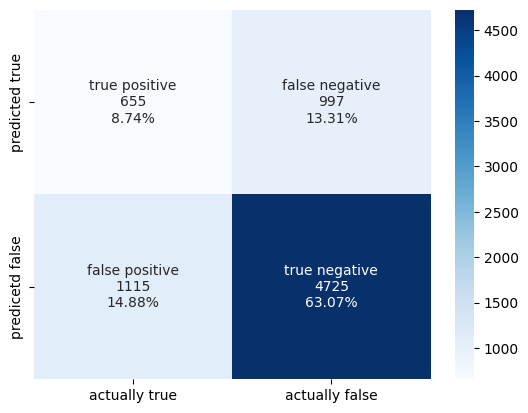

In [ ]:

group_name =  ["true positive", "false negative", "false positive", "true negative"]
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten() / np.sum(matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_name, group_counts, group_percentages)]
labels = np.array(labels).reshape(2,2)

sns.heatmap(matrix, annot=labels,
            fmt="", cmap = "Blues",
            xticklabels= ["actually true", "actually false"],
            yticklabels= ["predicted true", "predicetd false"])

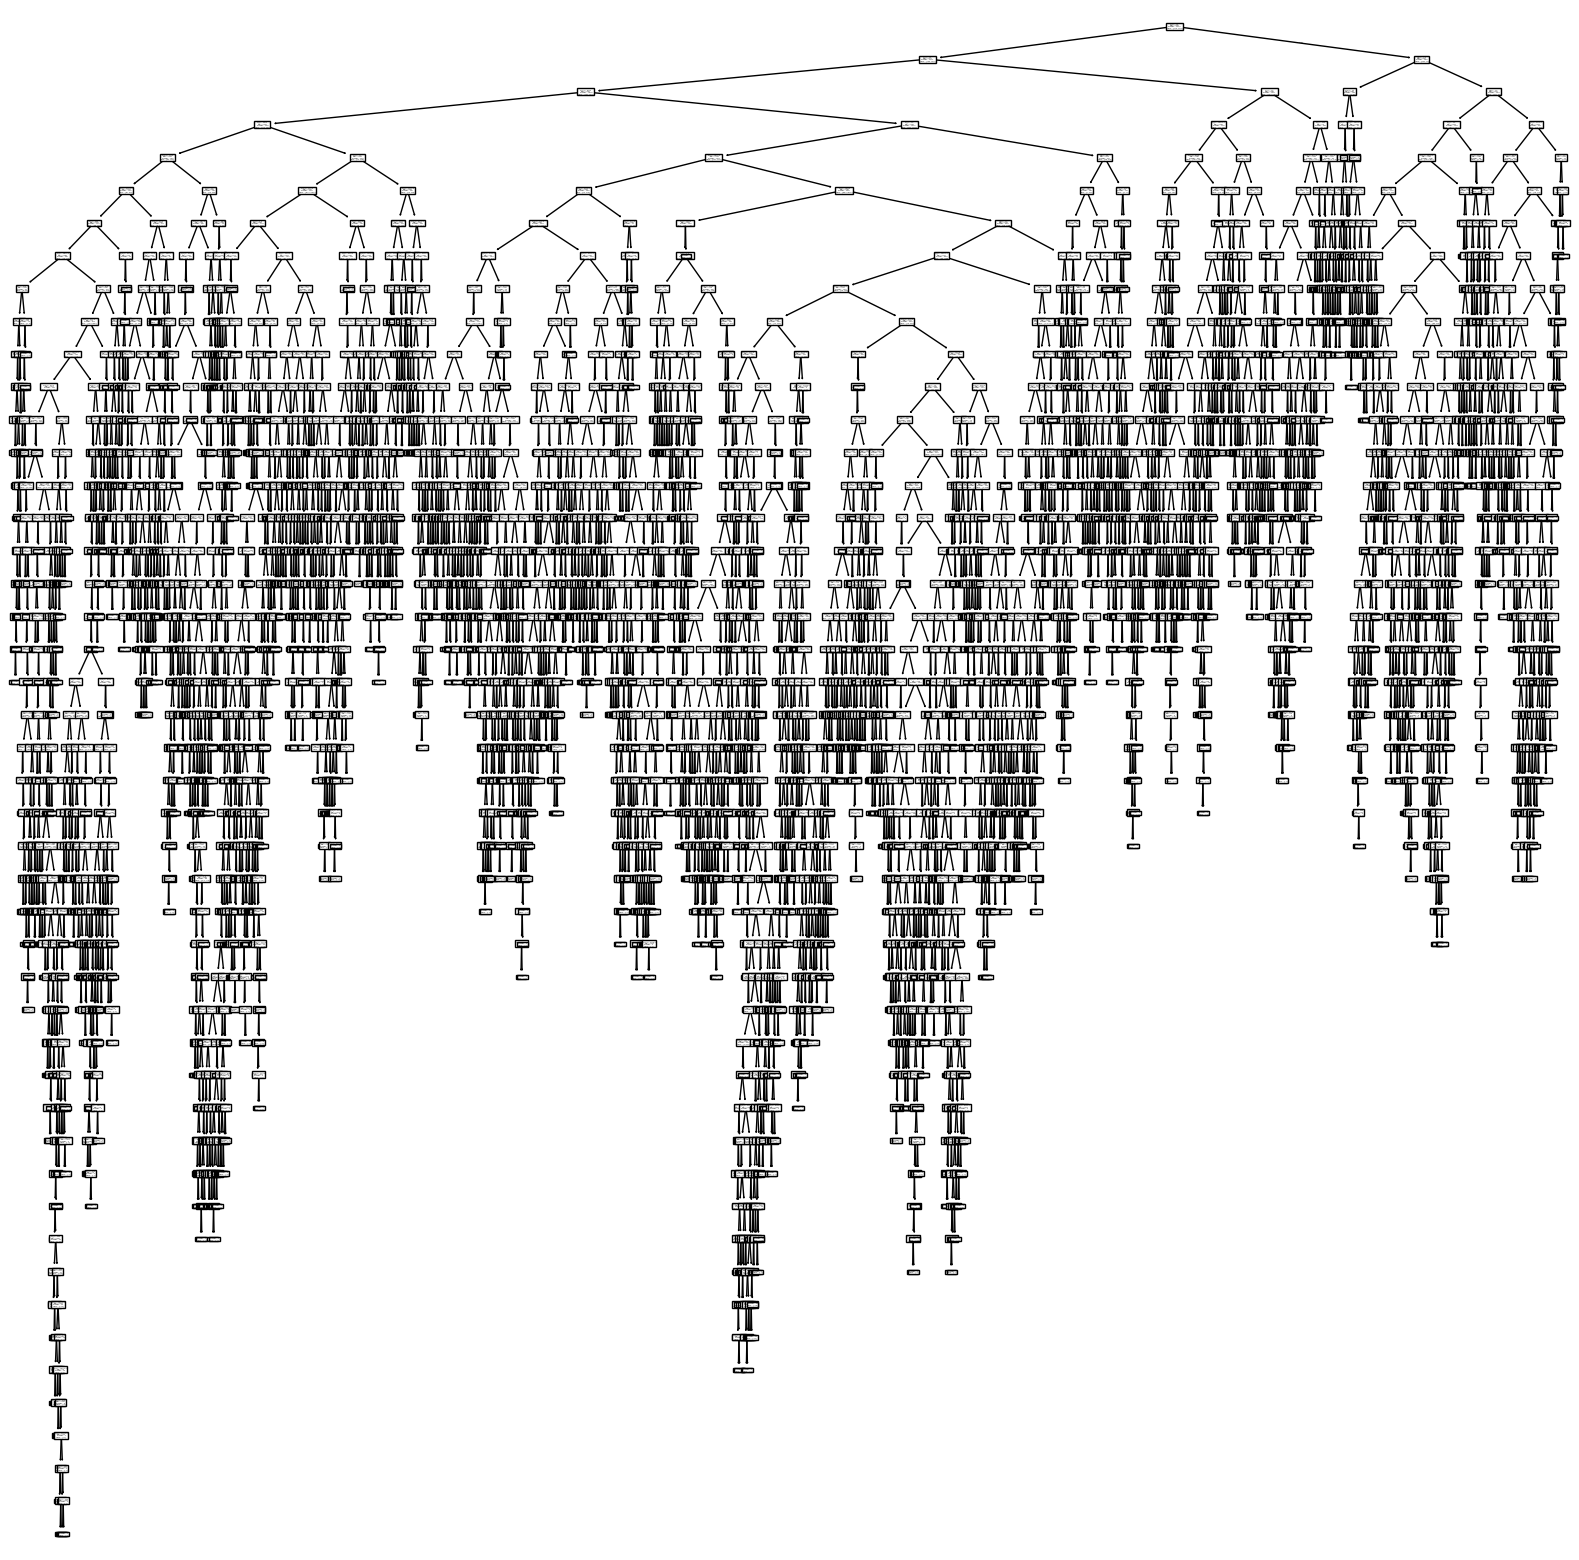

In [ ]:
plt.figure(figsize = (20,20))
tree.plot_tree(naive_tree)
plt.show()

In [ ]:
simple_tree = DecisionTreeClassifier(max_depth = 3)
simple_tree.fit(nX_train, ny_train)

DecisionTreeClassifier(max_depth=3)

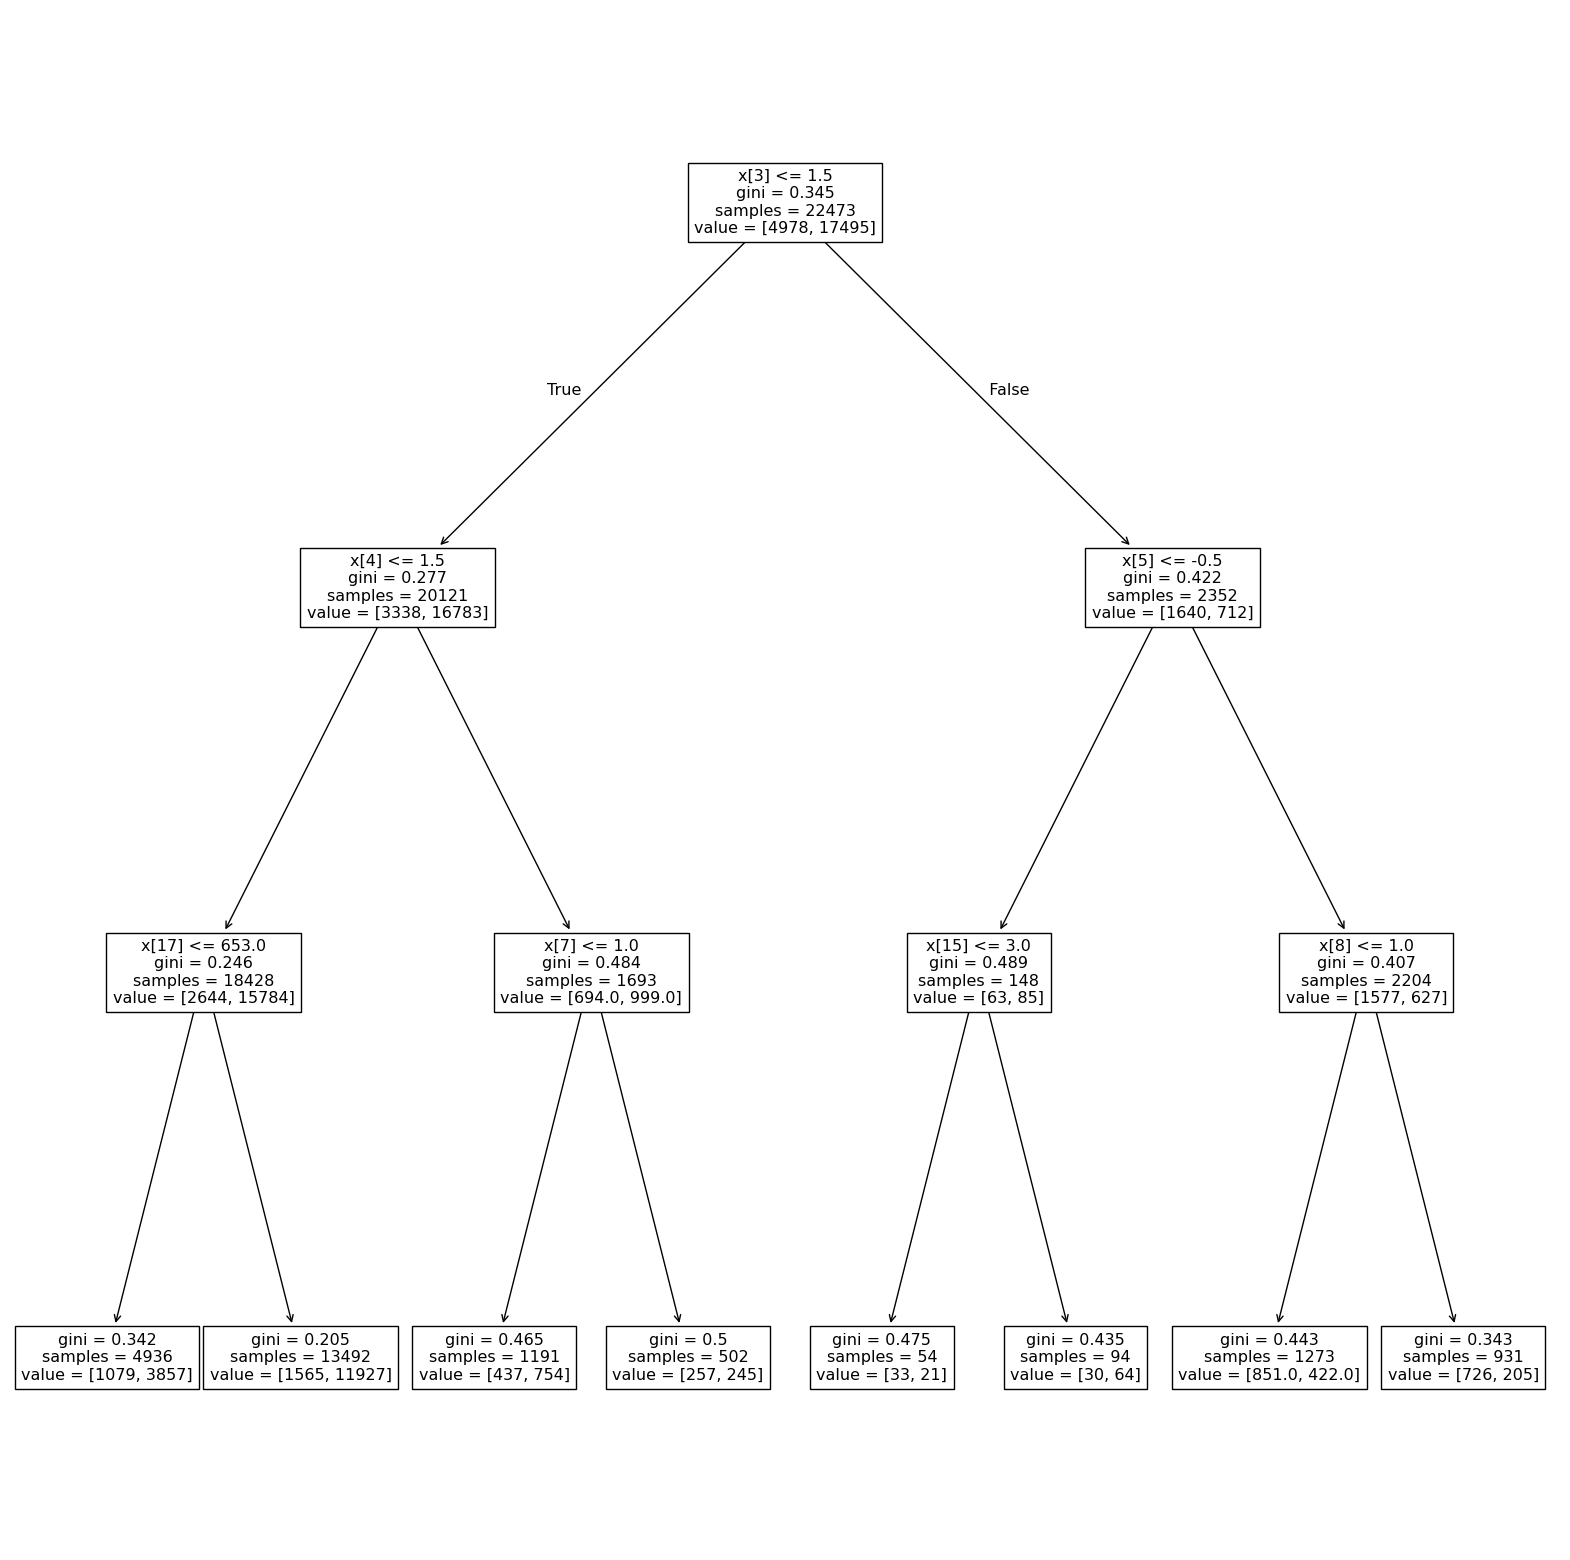

In [ ]:
plt.figure(figsize = (20,20))
tree.plot_tree(simple_tree)
plt.show()

In [ ]:
cleaned_df.iloc[:,[3,4,17,7]]

,LIMIT_BAL,MARRIAGE,BILL_AMT6,PAY_2
0,20000,1,0,2
1,120000,2,3261,2
2,90000,2,15549,0
3,50000,1,29547,0
4,50000,1,19131,0
...,...,...,...,...
29960,220000,1,15980,0
29961,150000,2,0,-1
29962,30000,2,19357,3
29963,80000,1,48944,-1


# Compare Model Results

In [ ]:
# use best ANN model in comparison with others
mlp_avg_accuracy = winning_scores_mlp[0]
mlp_avg_precision = winning_scores_mlp[1]
mlp_avg_recall = winning_scores_mlp[2]
mlp_avg_f1 = winning_scores_mlp[3]

In [ ]:
# Decision Tree
dt_avg_accuracy = naive_tree.score(nX_test, ny_test)
dt_avg_precision = precision_score(ny_test, ny_predict)
dt_avg_recall = recall_score(ny_test, ny_predict)
dt_avg_f1 = f1_score(ny_test, ny_predict)

In [ ]:
# build dictionaries for comparing results across models
accuracy_results = {'Logistic Regression': log_reg_avg_accuracy,
                    'SVM': svm_avg_accuracy,
                    'ANN': mlp_avg_accuracy,
                    'Decision Tree': dt_avg_accuracy,
                    'Random Forest': rf_avg_accuracy}

precision_results = {'Logistic Regression': log_reg_avg_precision,
                    'SVM': svm_avg_precision,
                    'ANN': mlp_avg_precision,
                    'Decision Tree': dt_avg_precision,
                    'Random Forest': rf_avg_precision}

recall_results = {'Logistic Regression': log_reg_avg_recall,
                    'SVM': svm_avg_recall,
                    'ANN': mlp_avg_recall,
                    'Decision Tree': dt_avg_recall,
                    'Random Forest': rf_avg_recall}

f1_results = {'Logistic Regression': log_reg_avg_f1,
                    'SVM': svm_avg_f1,
                    'ANN': mlp_avg_f1,
                    'Decision Tree': dt_avg_f1,
                    'Random Forest': rf_avg_f1}

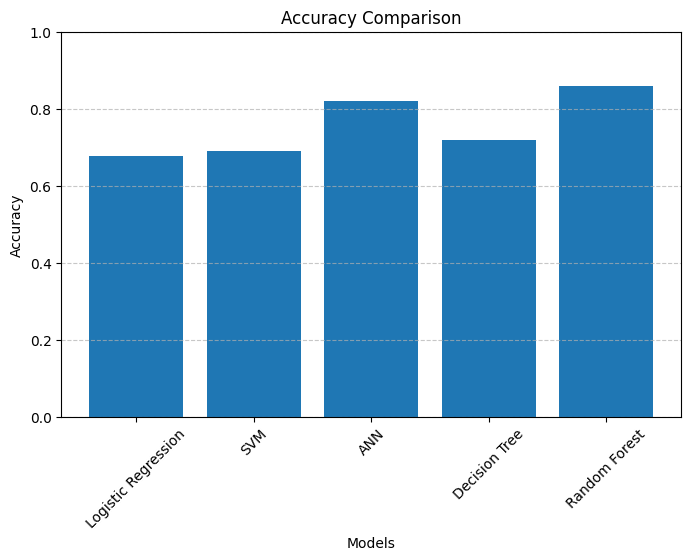

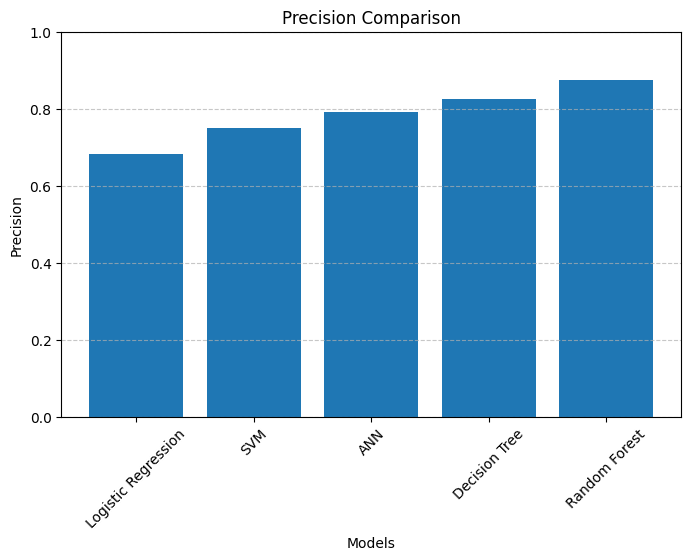

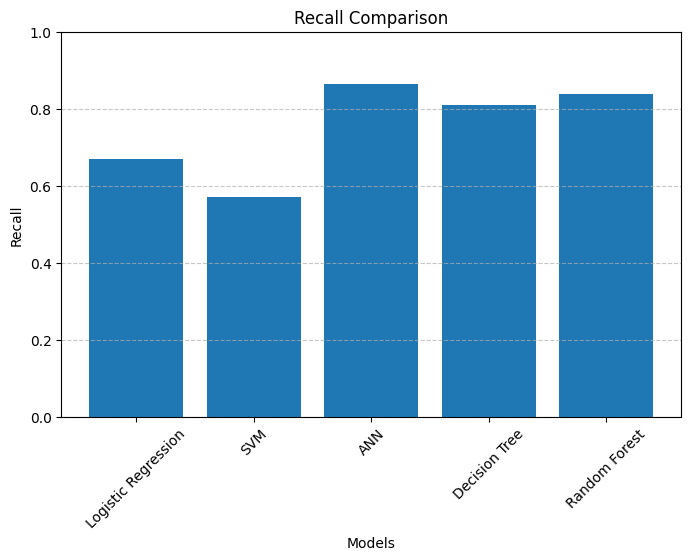

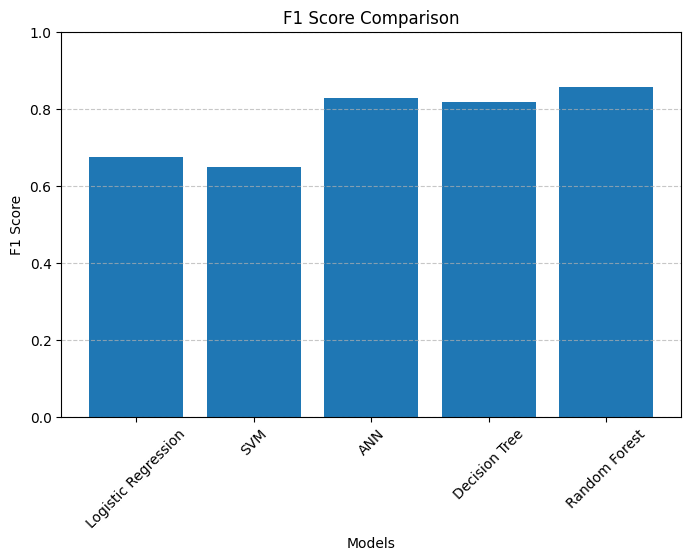

In [ ]:
# Function to create bar charts for each metric
def plot_metrics(metrics_dict, metric_name):
    models = list(metrics_dict.keys())
    scores = list(metrics_dict.values())

    plt.figure(figsize=(8, 5))
    plt.bar(models, scores)
    plt.title(f'{metric_name} Comparison')
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.ylim(0, 1)  # Assuming scores are between 0 and 1
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot each metric
plot_metrics(accuracy_results, 'Accuracy')
plot_metrics(precision_results, 'Precision')
plot_metrics(recall_results, 'Recall')
plot_metrics(f1_results, 'F1 Score')